In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import ExponentialSmoothing
%matplotlib inline

In [30]:
df_original= pd.read_csv("data_info_main_par.csv")

In [31]:
df_original['Time']=pd.to_datetime(df_original['Time']).dt.date
df = df_original[['Time','Temperature']]
df.columns=['date','temp']

In [32]:
df_original

,Time,Temperature,Relative Humidity
0,2018-12-07,22,94
1,2018-12-07,22,89
2,2018-12-07,22,95
3,2018-12-07,21,91
4,2018-12-07,21,93
...,...,...,...
44503,2023-11-12,23,86
44504,2023-11-12,24,67
44505,2023-11-12,25,78
44506,2023-11-12,23,68


In [33]:
df1=df_original[['Time','Relative Humidity']]
df1.columns=['date','humid']

## See the full data

In [34]:
df1['date']=pd.to_datetime(df1['date'])

/var/folders/53/jcnf3b317l51g0_j0z_9ydzc0000gn/T/ipykernel_81599/3454300950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date']=pd.to_datetime(df1['date'])


In [35]:
df1=df1.groupby('date').mean()

In [36]:
df_orig1=df1.reset_index()
df_orig1

,date,humid
0,2018-12-07,88.875000
1,2018-12-08,76.440000
2,2018-12-09,75.200000
3,2018-12-10,75.750000
4,2018-12-11,68.307692
...,...,...
1613,2023-11-08,76.958333
1614,2023-11-09,81.083333
1615,2023-11-10,82.291667
1616,2023-11-11,84.750000


Text(0, 0.5, 'Humidity')

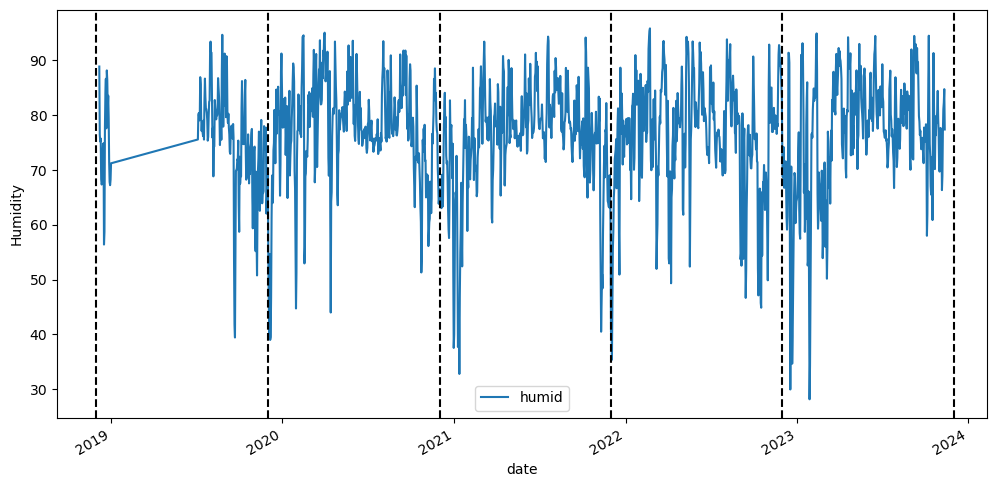

In [37]:
ax = df_orig1.plot(x='date', y='humid', figsize=(12,6))
xcoords = ['2018-12-01','2019-12-01','2020-12-01','2021-12-01','2022-12-01','2023-12-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')
ax.set_ylabel('Humidity')

In [38]:
df=df.groupby('date').mean()
df_orig=df.reset_index()
df_orig

,date,temp
0,2018-12-07,20.312500
1,2018-12-08,18.000000
2,2018-12-09,17.040000
3,2018-12-10,17.000000
4,2018-12-11,18.000000
...,...,...
1613,2023-11-08,25.000000
1614,2023-11-09,25.625000
1615,2023-11-10,26.958333
1616,2023-11-11,25.208333


Text(0, 0.5, 'temperature')

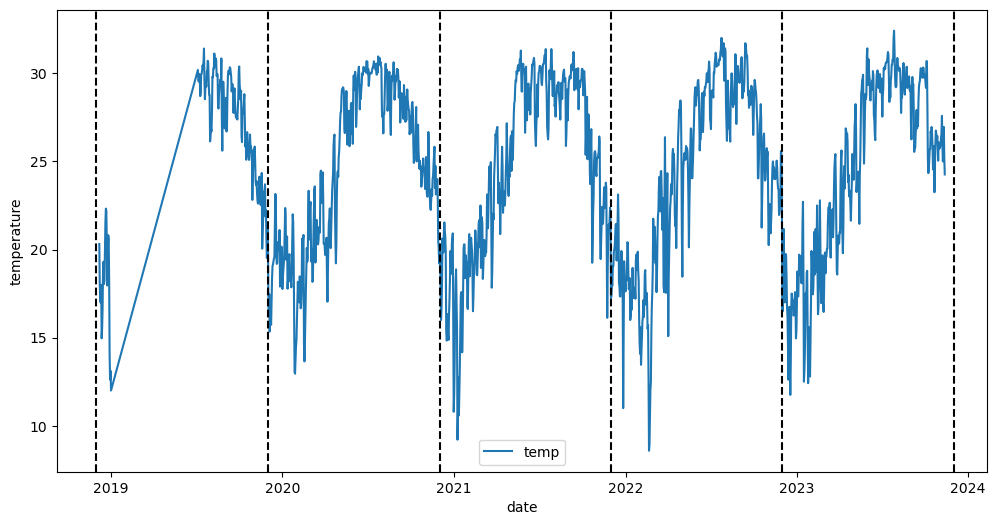

In [39]:
ax = df_orig.plot(x='date', y='temp', figsize=(12,6))
xcoords = ['2018-12-01','2019-12-01','2020-12-01','2021-12-01','2022-12-01','2023-12-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')
ax.set_ylabel('temperature')

## Data afer 2019-07-31

In [43]:
df_original['Time']=pd.to_datetime(df_original['Time']).dt.date
df = df_original[['Time','Temperature']]
df.columns=['date','temp']

In [44]:
df1=df_original[['Time','Relative Humidity']]
df1.columns=['date','humid']

In [45]:
df1['date']=pd.to_datetime(df1['date'])

/var/folders/53/jcnf3b317l51g0_j0z_9ydzc0000gn/T/ipykernel_81599/3454300950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date']=pd.to_datetime(df1['date'])


In [46]:
df1=df1.groupby('date').mean()
df1=df1.loc['2019-07-31':]

In [47]:
df_orig1=df1.reset_index()
df_orig1

,date,humid
0,2019-07-31,91.508475
1,2019-08-01,93.421875
2,2019-08-02,91.433333
3,2019-08-03,91.397059
4,2019-08-04,82.770492
...,...,...
1561,2023-11-08,76.958333
1562,2023-11-09,81.083333
1563,2023-11-10,82.291667
1564,2023-11-11,84.750000


In [48]:
df

,date,temp
0,2018-12-07,22
1,2018-12-07,22
2,2018-12-07,22
3,2018-12-07,21
4,2018-12-07,21
...,...,...
44503,2023-11-12,23
44504,2023-11-12,24
44505,2023-11-12,25
44506,2023-11-12,23


In [49]:
df['date']=pd.to_datetime(df['date'])

/var/folders/53/jcnf3b317l51g0_j0z_9ydzc0000gn/T/ipykernel_81599/1213281828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df['date'])


In [50]:
df=df.groupby('date').mean()
df=df.loc['2019-07-31':]

In [51]:
df_orig=df.reset_index()
df_orig

,date,temp
0,2019-07-31,26.135593
1,2019-08-01,26.468750
2,2019-08-02,26.866667
3,2019-08-03,26.705882
4,2019-08-04,27.737705
...,...,...
1561,2023-11-08,25.000000
1562,2023-11-09,25.625000
1563,2023-11-10,26.958333
1564,2023-11-11,25.208333


## Temperature

Text(0, 0.5, 'temperature')

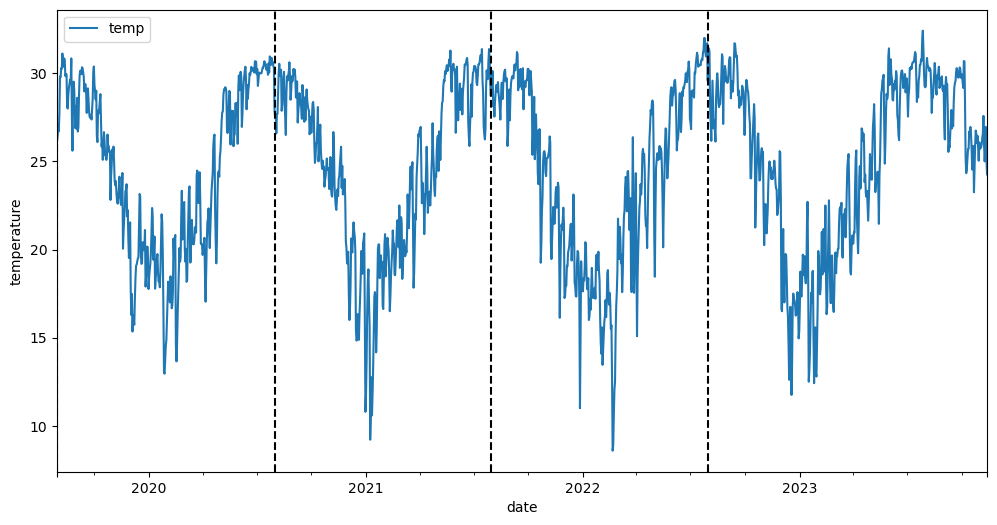

In [138]:
ax = df_orig.plot(x='date', y='temp', figsize=(12,6))
xcoords = ['2019-07-31','2020-07-31','2021-07-31','2022-07-31','2023-12-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')
ax.set_ylabel('temperature')

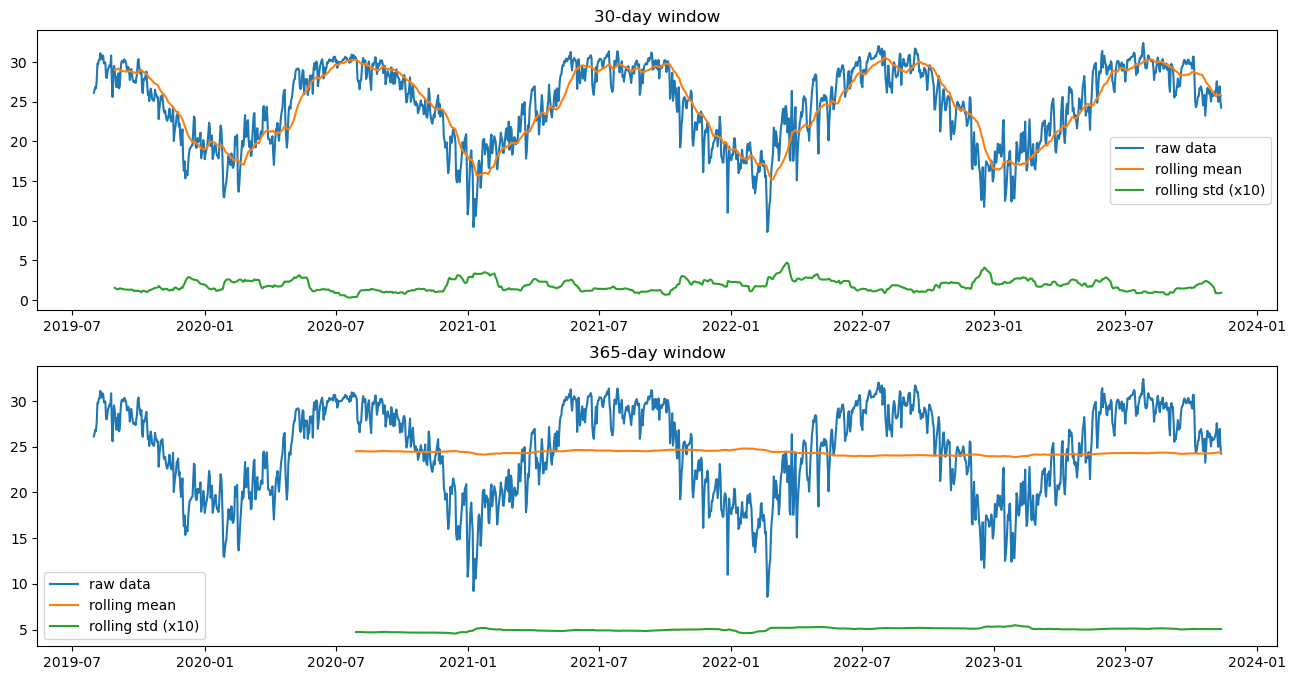

In [139]:
def analyze_stationarity(timeseries, title):
    fig, ax = plt.subplots(2, 1, figsize=(16, 8))

    rolmean = pd.Series(timeseries).rolling(window=30).mean() 
    rolstd = pd.Series(timeseries).rolling(window=30).std()
    ax[0].plot(timeseries, label= title)
    ax[0].plot(rolmean, label='rolling mean');
    ax[0].plot(rolstd, label='rolling std (x10)');
    ax[0].set_title('30-day window')
    ax[0].legend()
 
    rolmean = pd.Series(timeseries).rolling(window=365).mean() 
    rolstd = pd.Series(timeseries).rolling(window=365).std()
    ax[1].plot(timeseries, label= title)
    ax[1].plot(rolmean, label='rolling mean');
    ax[1].plot(rolstd, label='rolling std (x10)');
    ax[1].set_title('365-day window')
    ax[1].legend()
pd.options.display.float_format = '{:.8f}'.format
analyze_stationarity(df['temp'], 'raw data')

In [141]:
def ADF_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = round(value,2)
    print(dfoutput)

ADF_test(df['temp'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.54841687
p-value                          0.10413385
Lags Used                       11.00000000
Number of Observations Used   1554.00000000
Critical Value (1%)             -3.43000000
Critical Value (5%)             -2.86000000
Critical Value (10%)            -2.57000000
dtype: float64


In [142]:
def KPSS_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries.dropna(), regression="c", nlags="auto")    
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

KPSS_test(df['temp'])


Results of KPSS Test:
Test Statistic           0.13252218
p-value                  0.10000000
Lags Used               25.00000000
Critical Value (10%)     0.34700000
Critical Value (5%)      0.46300000
Critical Value (2.5%)    0.57400000
Critical Value (1%)      0.73900000
dtype: float64


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Results of Dickey-Fuller Test:
Test Statistic                 -11.37054445
p-value                          0.00000000
Lags Used                        2.00000000
Number of Observations Used   1198.00000000
Critical Value (1%)             -3.44000000
Critical Value (5%)             -2.86000000
Critical Value (10%)            -2.57000000
dtype: float64


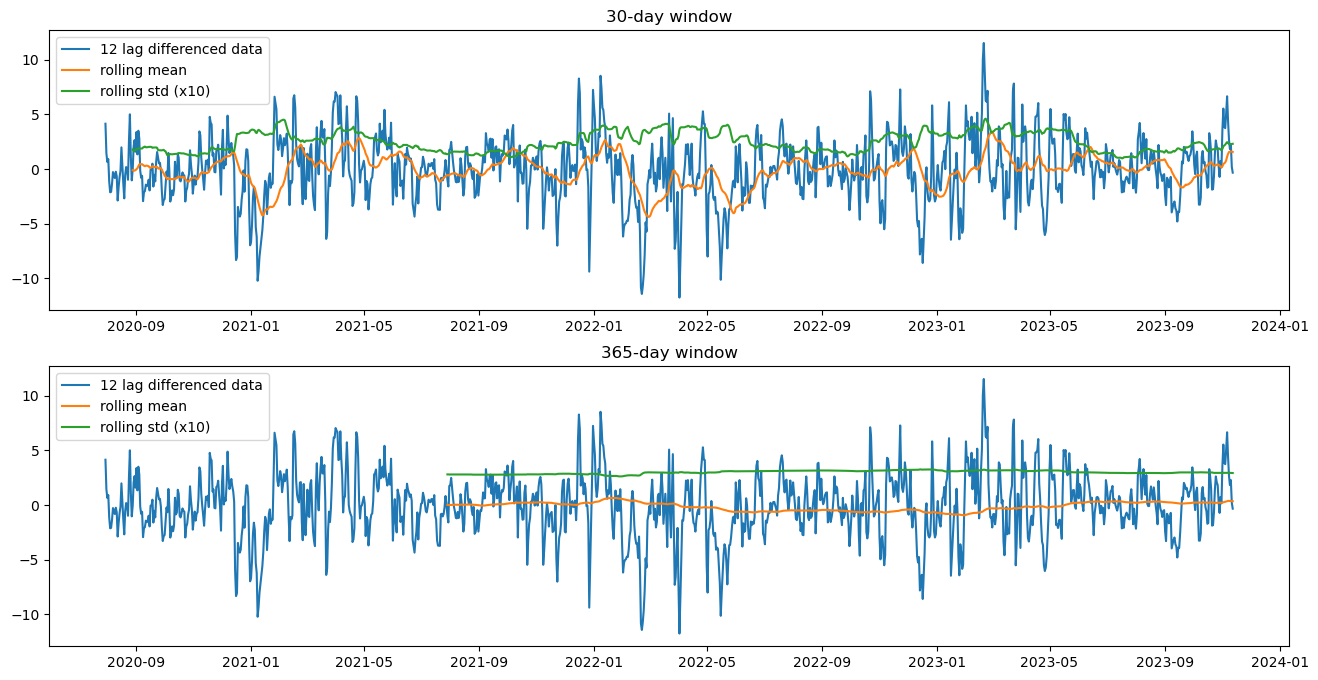

In [143]:
df_365lag =  df - df.shift(365)
#df_365lag =  df
analyze_stationarity(df_365lag['temp'].dropna(), '12 lag differenced data')
ADF_test(df_365lag.dropna())

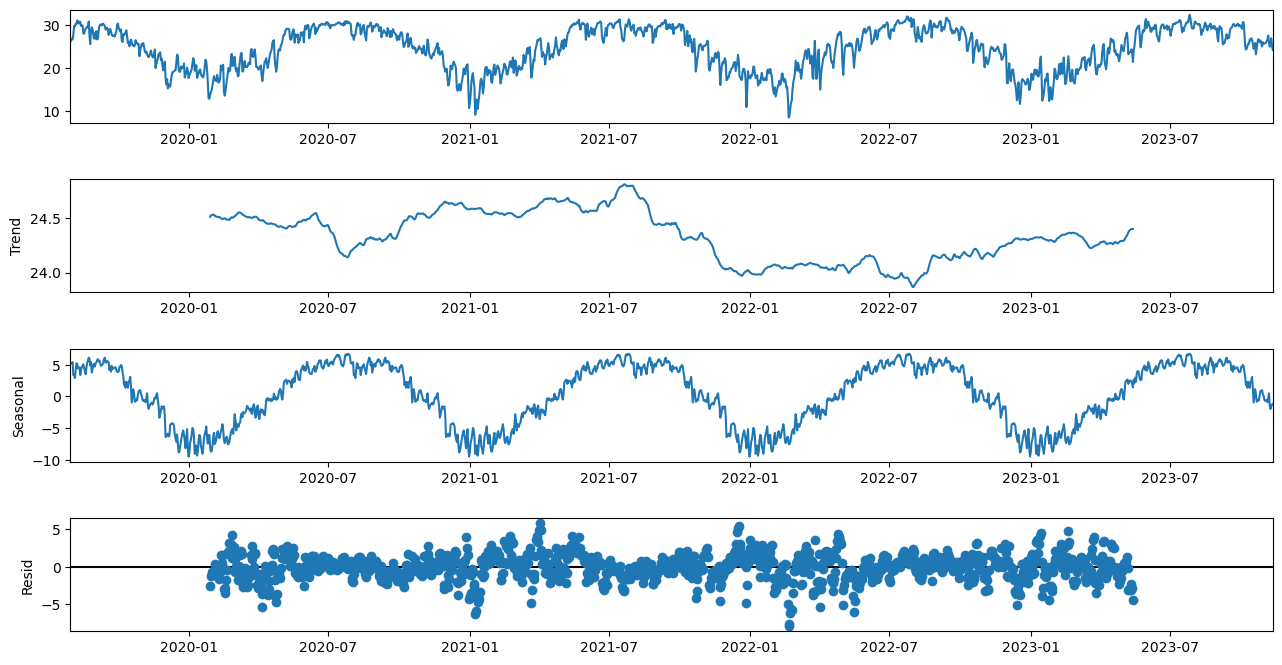

(date
 2019-07-31   NaN
 2019-08-01   NaN
 2019-08-02   NaN
 2019-08-03   NaN
 2019-08-04   NaN
               ..
 2023-11-08   NaN
 2023-11-09   NaN
 2023-11-10   NaN
 2023-11-11   NaN
 2023-11-12   NaN
 Name: trend, Length: 1566, dtype: float64,
 date
 2019-07-31    5.27946506
 2019-08-01    5.18261508
 2019-08-02    5.17714225
 2019-08-03    5.40743893
 2019-08-04    3.36356544
                  ...    
 2023-11-08   -1.41914198
 2023-11-09   -1.98366947
 2023-11-10   -1.59069277
 2023-11-11   -1.28234018
 2023-11-12   -1.18227897
 Name: seasonal, Length: 1566, dtype: float64,
 date
 2019-07-31   NaN
 2019-08-01   NaN
 2019-08-02   NaN
 2019-08-03   NaN
 2019-08-04   NaN
               ..
 2023-11-08   NaN
 2023-11-09   NaN
 2023-11-10   NaN
 2023-11-11   NaN
 2023-11-12   NaN
 Name: resid, Length: 1566, dtype: float64)

In [144]:
def seasonal_decompose (df):
    decomposition = sm.tsa.seasonal_decompose(df, model='additive', period=365)
 
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
 
    fig = decomposition.plot()
    fig.set_size_inches(14, 7)
    plt.show()
 
    return trend, seasonal, residual
 
seasonal_decompose(df)

In [145]:
y = df['temp'].astype(float)
y_to_train = y[:'2022-06-30']
y_to_val = y['2022-07-01':]
predict_date = len(y) - len(y[:'2022-06-30'])

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


The Root Mean Squared Error of additive trend, additive seasonal of period season_length=365 and a Box-Cox transformation 3.23


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


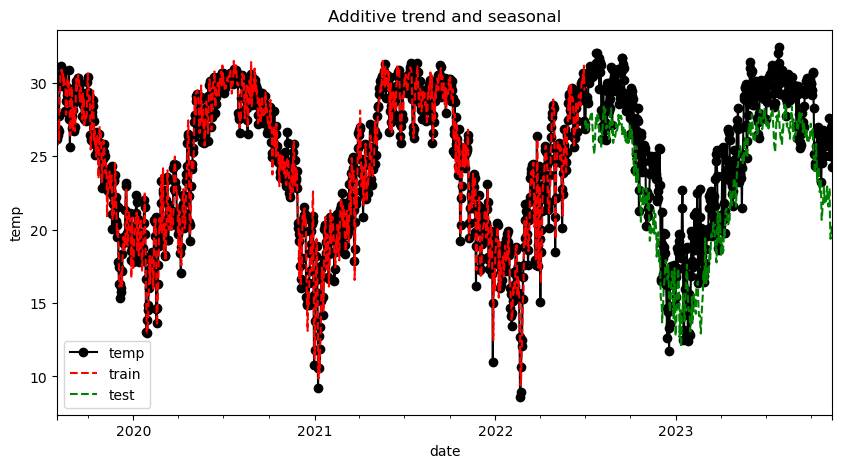

In [146]:
def holt_win_sea(y, y_to_train, y_to_test, seasonal_period, predict_date):
    fit1 = ExponentialSmoothing(y_to_train, seasonal_periods=seasonal_period, trend='add', seasonal='add').fit()
    fcast1 = fit1.forecast(predict_date).rename('Additive')
    mse1 = ((fcast1 - y_to_test.values) ** 2).mean()
    print('The Root Mean Squared Error of additive trend, additive seasonal of '+ 
          'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse1), 2)))

    y.plot(marker='o', color='black', legend=True, figsize=(10, 5))
    fit1.fittedvalues.plot(style='--', color='red', label='train')
    fcast1.plot(style='--', color='green', label='test')
    plt.ylabel('temp')
    plt.title('Additive trend and seasonal')
    plt.legend()
    plt.show()

holt_win_sea(y, y_to_train, y_to_val, 365, predict_date)

## Humid

Text(0, 0.5, 'Humidity')

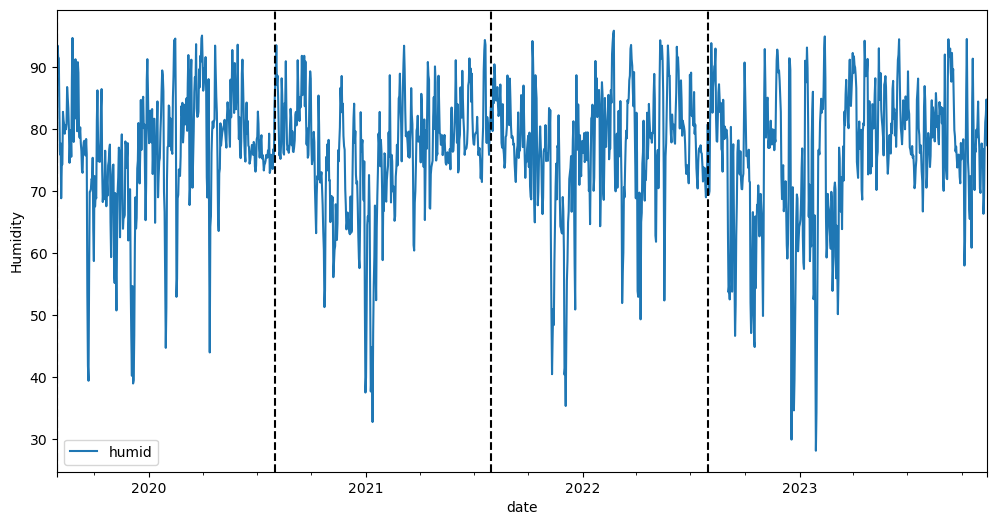

In [181]:
ax = df_orig1.plot(x='date', y='humid', figsize=(12,6))
xcoords = ['2019-07-31','2020-07-31','2021-07-31','2022-07-31','2023-12-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')
ax.set_ylabel('Humidity')

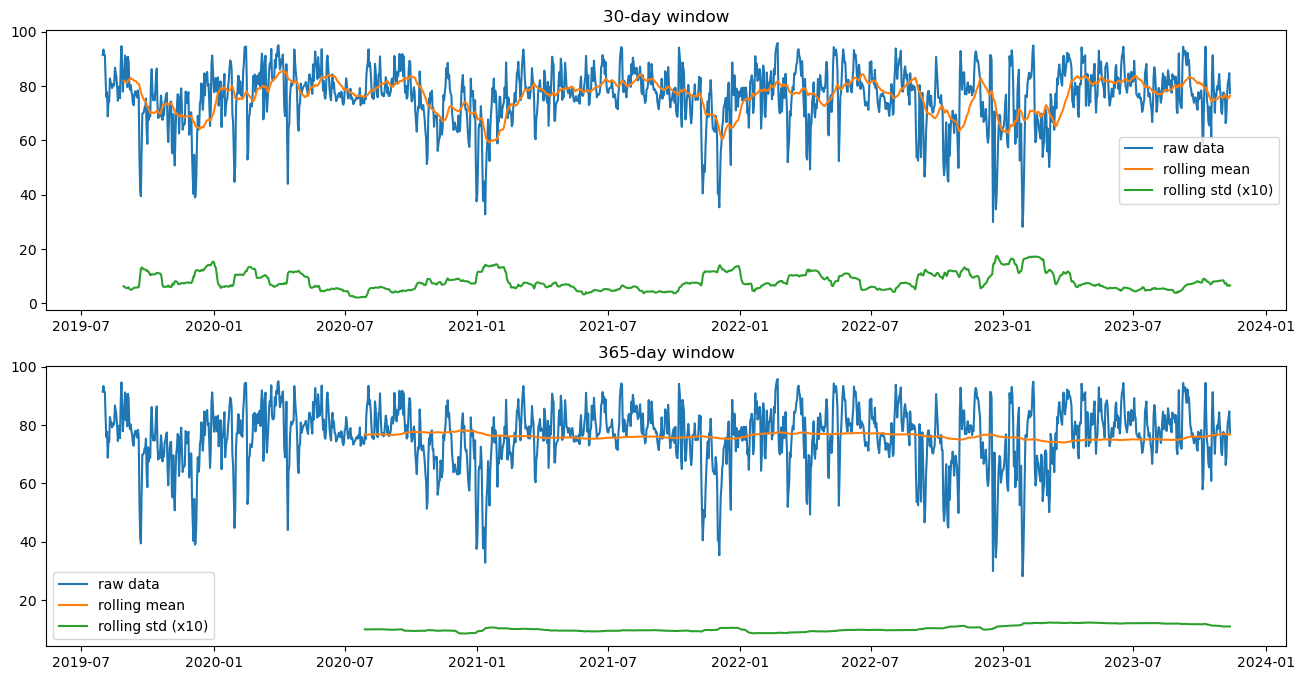

In [182]:
def analyze_stationarity(timeseries, title):
    fig, ax = plt.subplots(2, 1, figsize=(16, 8))

    rolmean = pd.Series(timeseries).rolling(window=30).mean() 
    rolstd = pd.Series(timeseries).rolling(window=30).std()
    ax[0].plot(timeseries, label= title)
    ax[0].plot(rolmean, label='rolling mean');
    ax[0].plot(rolstd, label='rolling std (x10)');
    ax[0].set_title('30-day window')
    ax[0].legend()
 
    rolmean = pd.Series(timeseries).rolling(window=365).mean() 
    rolstd = pd.Series(timeseries).rolling(window=365).std()
    ax[1].plot(timeseries, label= title)
    ax[1].plot(rolmean, label='rolling mean');
    ax[1].plot(rolstd, label='rolling std (x10)');
    ax[1].set_title('365-day window')
    ax[1].legend()
pd.options.display.float_format = '{:.8f}'.format
analyze_stationarity(df1['humid'], 'raw data')

In [183]:
def ADF_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = round(value,2)
    print(dfoutput)

ADF_test(df1['humid'])

Results of Dickey-Fuller Test:
Test Statistic                  -8.17985244
p-value                          0.00000000
Lags Used                        8.00000000
Number of Observations Used   1557.00000000
Critical Value (1%)             -3.43000000
Critical Value (5%)             -2.86000000
Critical Value (10%)            -2.57000000
dtype: float64


In [184]:
def KPSS_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries.dropna(), regression="c", nlags="auto")    
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

KPSS_test(df1['humid'])

Results of KPSS Test:
Test Statistic           0.08131034
p-value                  0.10000000
Lags Used               21.00000000
Critical Value (10%)     0.34700000
Critical Value (5%)      0.46300000
Critical Value (2.5%)    0.57400000
Critical Value (1%)      0.73900000
dtype: float64


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Results of Dickey-Fuller Test:
Test Statistic                  -7.13658617
p-value                          0.00000000
Lags Used                        8.00000000
Number of Observations Used   1192.00000000
Critical Value (1%)             -3.44000000
Critical Value (5%)             -2.86000000
Critical Value (10%)            -2.57000000
dtype: float64


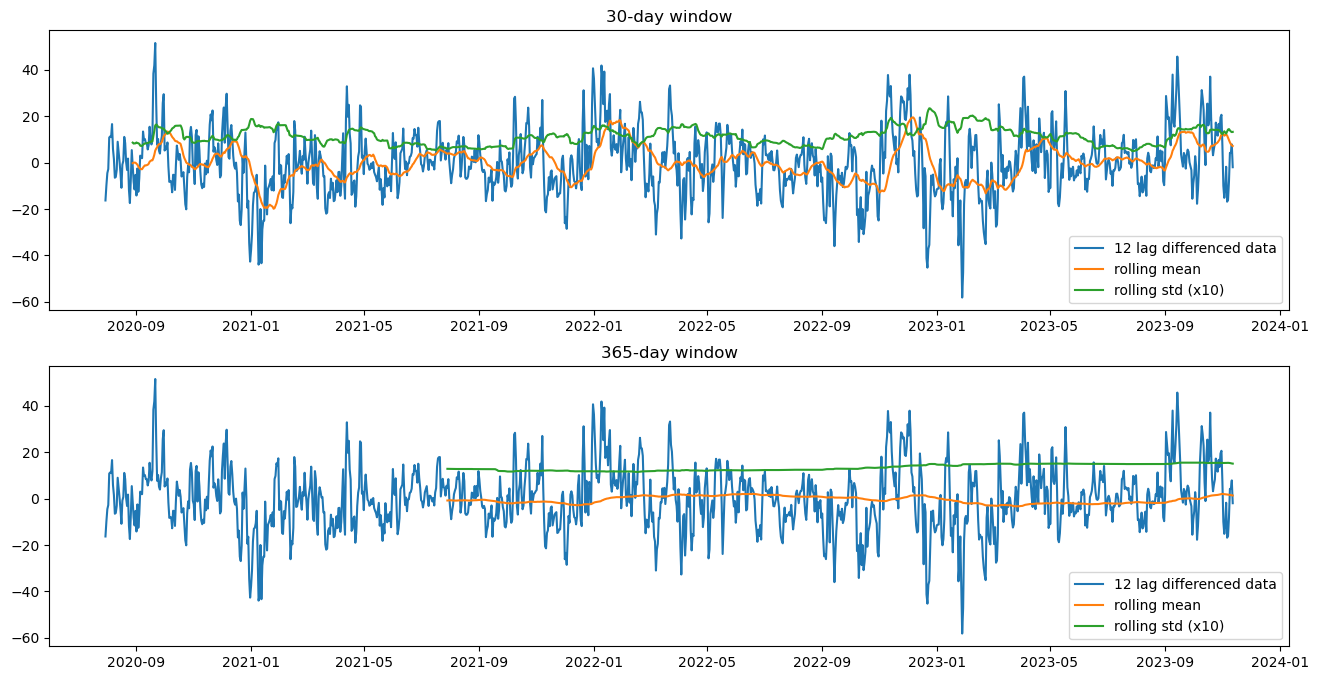

In [185]:
df1_365lag =  df1 - df1.shift(365)
analyze_stationarity(df1_365lag['humid'].dropna(), '12 lag differenced data')
ADF_test(df1_365lag.dropna())

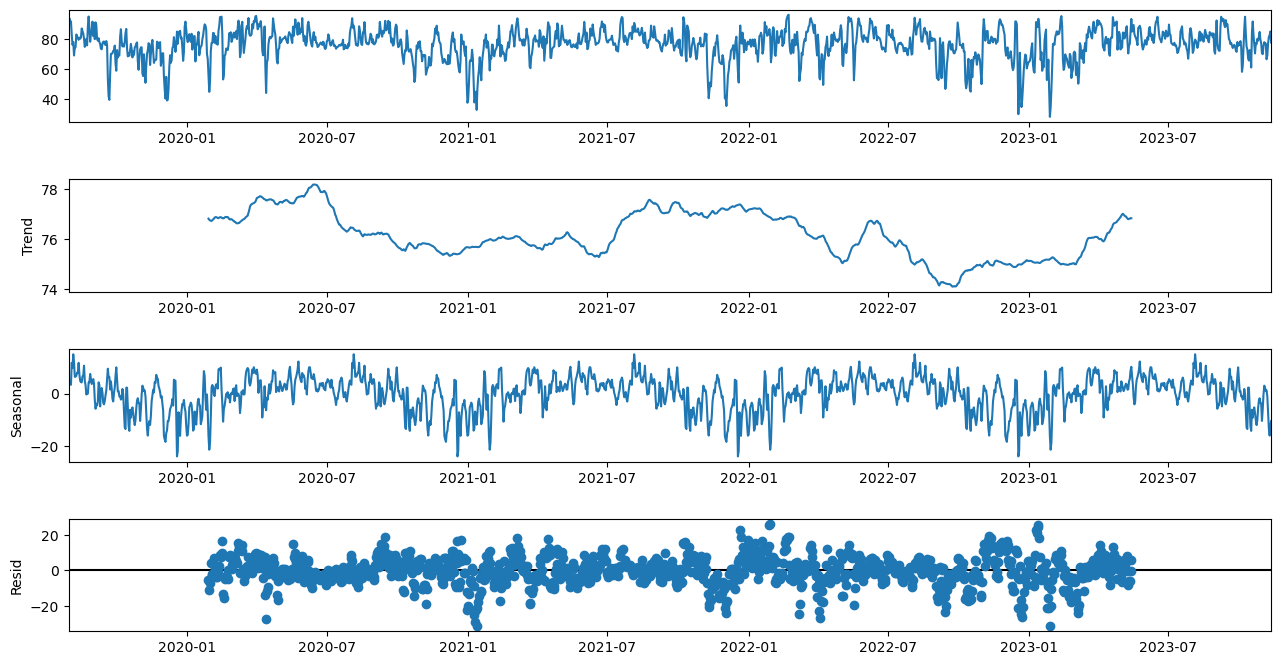

(date
 2019-07-31   NaN
 2019-08-01   NaN
 2019-08-02   NaN
 2019-08-03   NaN
 2019-08-04   NaN
               ..
 2023-11-08   NaN
 2023-11-09   NaN
 2023-11-10   NaN
 2023-11-11   NaN
 2023-11-12   NaN
 Name: trend, Length: 1566, dtype: float64,
 date
 2019-07-31     3.67791939
 2019-08-01     4.91749487
 2019-08-02     3.55117398
 2019-08-03     3.31166264
 2019-08-04    11.59144205
                  ...     
 2023-11-08    -7.10440607
 2023-11-09   -13.24988453
 2023-11-10   -15.91334989
 2023-11-11   -12.09045898
 2023-11-12   -10.42457982
 Name: seasonal, Length: 1566, dtype: float64,
 date
 2019-07-31   NaN
 2019-08-01   NaN
 2019-08-02   NaN
 2019-08-03   NaN
 2019-08-04   NaN
               ..
 2023-11-08   NaN
 2023-11-09   NaN
 2023-11-10   NaN
 2023-11-11   NaN
 2023-11-12   NaN
 Name: resid, Length: 1566, dtype: float64)

In [186]:
def seasonal_decompose (df):
    decomposition = sm.tsa.seasonal_decompose(df, model='additive', period=365)
 
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
 
    fig = decomposition.plot()
    fig.set_size_inches(14, 7)
    plt.show()
 
    return trend, seasonal, residual
 
seasonal_decompose(df1)

In [187]:
y = df1['humid'].astype(float)
y_to_train = y[:'2022-06-30']
y_to_val = y['2022-07-01':]
predict_date = len(y) - len(y[:'2022-06-30'])

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


The Root Mean Squared Error of additive trend, additive seasonal of period season_length=365 and a Box-Cox transformation 15.59


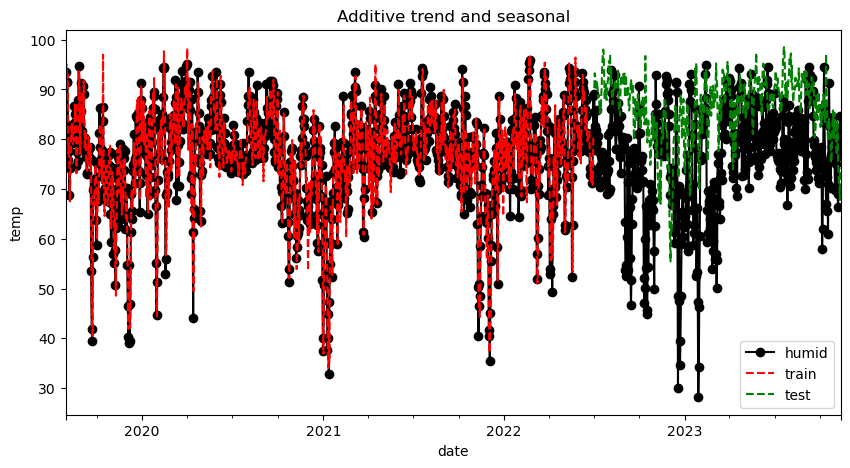

In [188]:
def holt_win_sea(y, y_to_train, y_to_test, seasonal_period, predict_date):
    fit1 = ExponentialSmoothing(y_to_train, seasonal_periods=seasonal_period, trend='add', seasonal='add').fit()
    fcast1 = fit1.forecast(predict_date).rename('Additive')
    mse1 = ((fcast1 - y_to_test.values) ** 2).mean()
    print('The Root Mean Squared Error of additive trend, additive seasonal of '+ 
          'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse1), 2)))

    y.plot(marker='o', color='black', legend=True, figsize=(10, 5))
    fit1.fittedvalues.plot(style='--', color='red', label='train')
    fcast1.plot(style='--', color='green', label='test')
    plt.ylabel('temp')
    plt.title('Additive trend and seasonal')
    plt.legend()
    plt.show()

holt_win_sea(y, y_to_train, y_to_val, 365, predict_date)